# iTalk

**Language:** R

**Paper:** Wang, Y., et al., iTALK: an R package to characterize and illustrate intercellular communication. bioRxiv, 2019.

**Code Resource:** https://github.com/Coolgenome/iTALK

**Claiming:** Inference of intercellular signaling networks (ligand-receptor)

**Method:** According to the study design (at a single timepoint/group or at multiple timepoints/ genetically subgroups) by gene expression

**Database:** 2,648 non-redundant and known interacting ligand-receptor pairs (from prior studies), which were classified into 4 categories: cytokines/chemokines, immune checkpoint genes, growth factors, and others

## Input

1. scRNA-seq data: gene-expression matrix (raw/normalized) with **rows as cells** and **columns as genes**

2. one of the matrix columns is cell type annotation"


Here, we use the example data from https://github.com/Coolgenome/iTALK

Download link: https://zenodo.org/record/4971891/files/example_data.txt?download=1

## Example

In [ ]:
if(!require(devtools)) install.packages("devtools");
devtools::install_github("Coolgenome/iTALK", build_vignettes = TRUE) # installation

In [ ]:
# This example data is from 10x pbmc dataset. Samples are randomly selected from each cell type. And groups are randomly assigned to each sample to make the illustration.
library(iTALK)

In [16]:
# read the data
data <-read.table('example_data.txt', sep='\t', header=T, stringsAsFactors = F)
head(data)

,MIR1302.10,FAM138A,OR4F5,RP11.34P13.7,RP11.34P13.8,AL627309.1,RP11.34P13.14,RP11.34P13.9,AP006222.2,RP4.669L17.10,⋯,AL590523.1,CT476828.1,PNRC2.1,SRSF10.1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1,cell_type
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1506,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,cd56_nk
1502,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,cd14_monocytes
1060,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,cd56_nk
1098,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,b_cells
1763,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,b_cells
1614,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,b_cells


In [17]:
## highly expressed ligand-receptor pairs

# find top 50 percent highly expressed genes
highly_exprs_genes <-rawParse(data, top_genes=50, stats='mean')
head(highly_exprs_genes)


[=========>-------------------------------------------------------------]  14%

[===================>---------------------------------------------------]  29%

[=============================>-----------------------------------------]  43%

[========================================>------------------------------]  57%

[==================================================>--------------------]  71%

[============================================================>----------]  86%

[=======================================================================] 100%
                                                                              



,gene,exprs,cell_type
,<chr>,<dbl>,<chr>
1,MALAT1,5.973592,cd56_nk
2,B2M,5.237566,cd56_nk
3,TMSB4X,4.912785,cd56_nk
4,GNLY,4.898929,cd56_nk
5,RPS27,4.793295,cd56_nk
6,RPL10,4.529574,cd56_nk


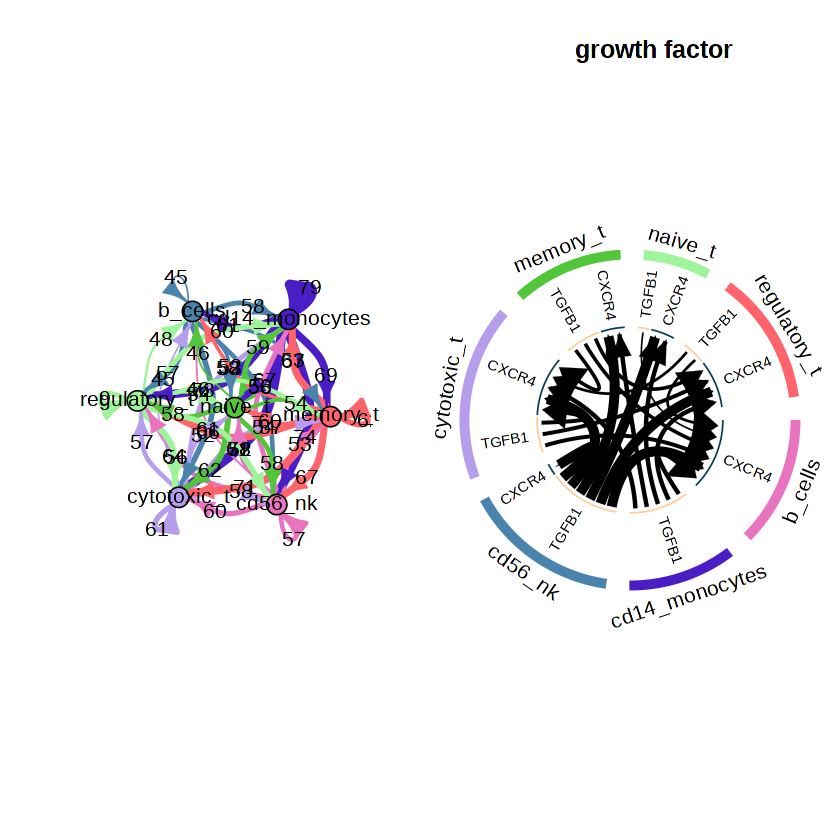

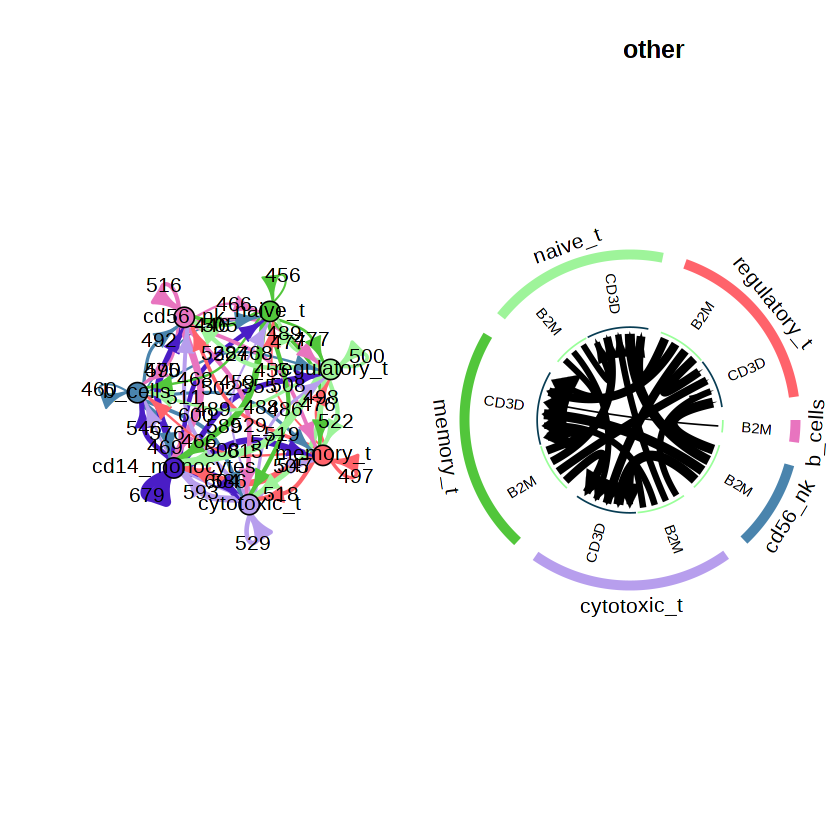

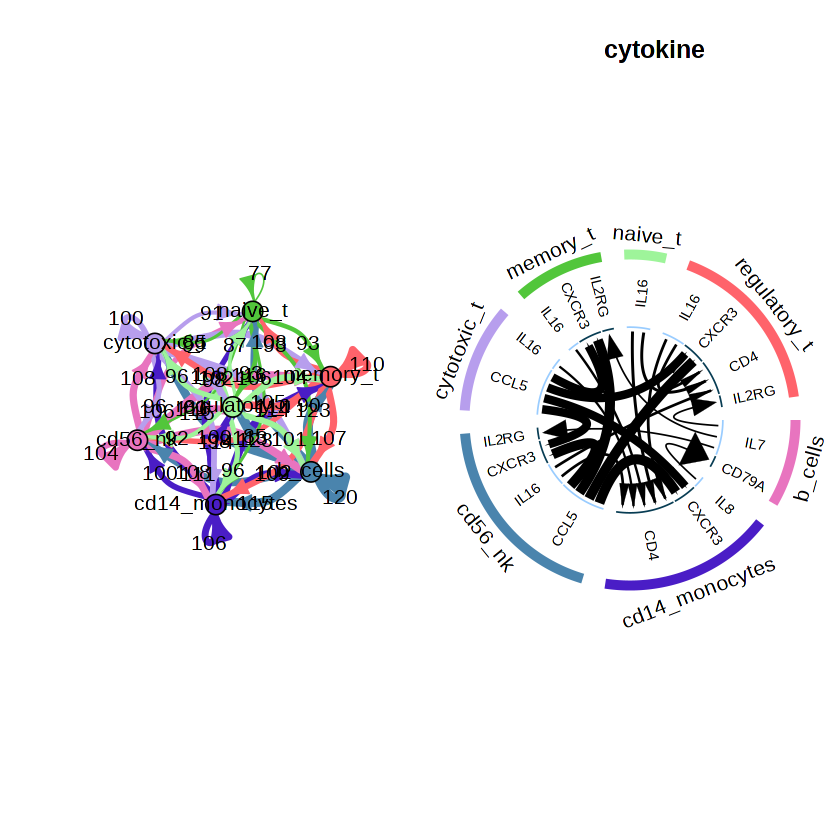

,ligand,receptor,cell_from_mean_exprs,cell_from,cell_to_mean_exprs,cell_to,comm_type
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
2104,TGFB1,CXCR4,0.6660346,cd56_nk,1.2605297,b_cells,growth factor
2105,TGFB1,CXCR4,0.6660346,cd56_nk,1.1479827,cytotoxic_t,growth factor
2106,TGFB1,CXCR4,0.6660346,cd56_nk,1.0099802,regulatory_t,growth factor
2108,TGFB1,CXCR4,0.6660346,cd56_nk,0.8259600,naive_t,growth factor
2107,TGFB1,CXCR4,0.6660346,cd56_nk,0.7852002,memory_t,growth factor
2111,TGFB1,CXCR4,0.3819657,cd14_monocytes,1.2605297,b_cells,growth factor


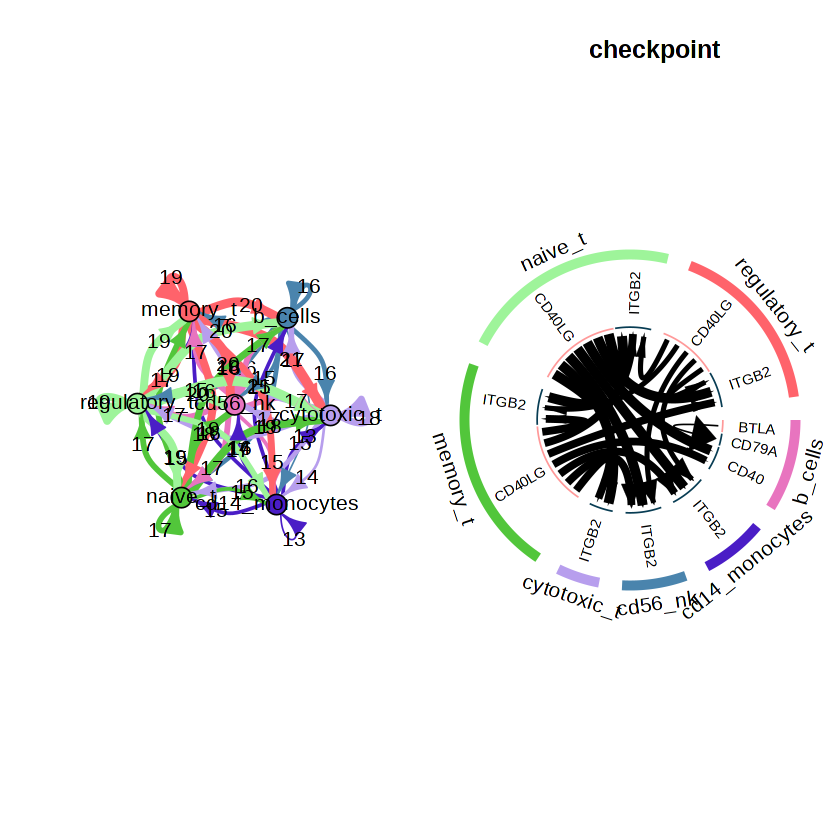

In [18]:
# find the ligand-receptor pairs from highly expressed genes
comm_list <-c('growth factor','other','cytokine','checkpoint')
cell_col <-structure( c('#4a84ad','#4a1dc6','#e874bf','#b79eed', '#ff636b', '#52c63b','#9ef49a'), names=unique(data$cell_type))
par(mfrow=c(1,2)) # for multiple plots display
res<-NULL
for(comm_type in comm_list){
  res_cat <-FindLR( highly_exprs_genes, datatype='mean count', comm_type=comm_type)
  res_cat<- res_cat[ order( res_cat$cell_from_mean_exprs*res_cat$cell_to_mean_exprs, decreasing=T),]
  #plot by ligand category
  #overall network plot
  NetView( res_cat, col=cell_col, vertex.label.cex=1, arrow.width=1, edge.max.width=5)
  #top 20 ligand-receptor pairs
  LRPlot( res_cat[1:20,], datatype='mean count', cell_col=cell_col, link.arr.lwd=res_cat$cell_from_mean_exprs[1:20], link.arr.width=res_cat$cell_to_mean_exprs[1:20])
  title(comm_type)
  res <-rbind(res,res_cat)
}
head(res)

IGRAPH 9bd3d4f DN-- 6 20 -- 
+ attr: name (v/c), size (v/n), color (v/c), label.color (v/c),
| label.cex (v/n), n (e/n), label (e/n), width (e/n), arrow.width
| (e/n), label.color (e/c), label.cex (e/n), color (e/c), loop.angle
| (e/n)
+ edges from 9bd3d4f (vertex names):
 [1] b_cells    ->memory_t     cd56_nk    ->cytotoxic_t 
 [3] cd56_nk    ->memory_t     cd56_nk    ->naive_t     
 [5] cd56_nk    ->regulatory_t cytotoxic_t->cytotoxic_t 
 [7] cytotoxic_t->memory_t     cytotoxic_t->naive_t     
 [9] cytotoxic_t->regulatory_t memory_t   ->cytotoxic_t 
+ ... omitted several edges

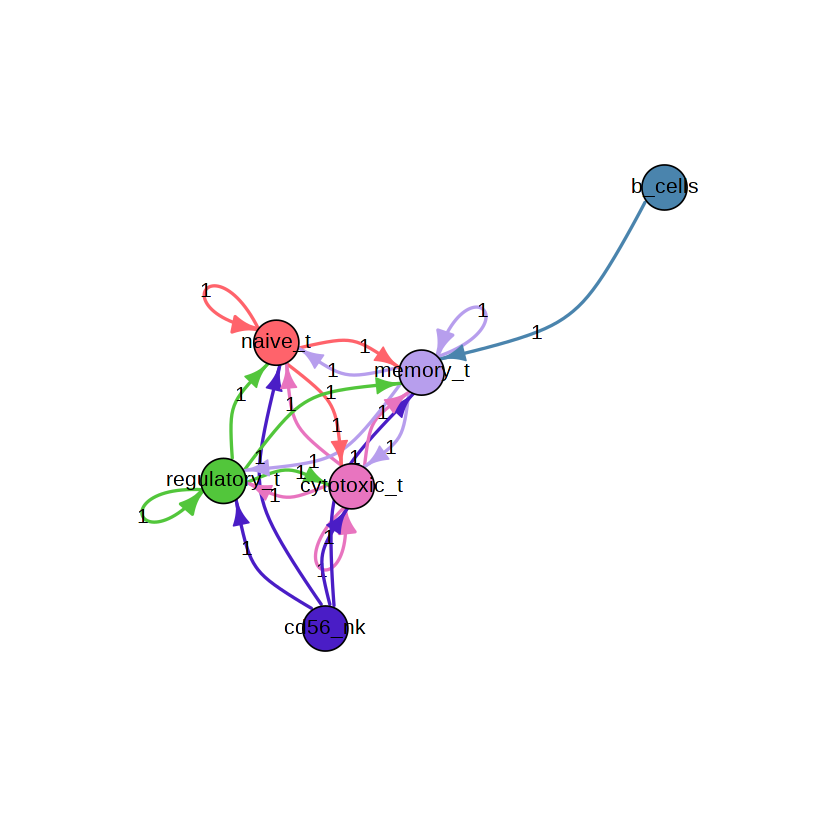

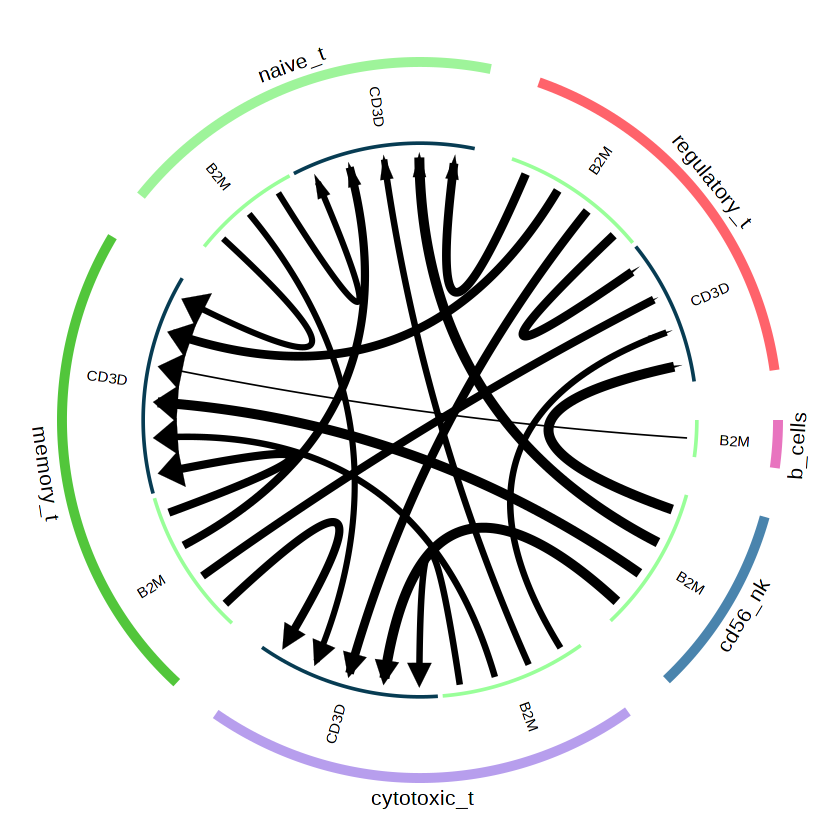

In [11]:
res<-res[order(res$cell_from_mean_exprs*res$cell_to_mean_exprs,decreasing=T),][1:20,]
NetView(res,col=cell_col,vertex.label.cex=1,arrow.width=1,edge.max.width=5)
LRPlot(res[1:20,],datatype='mean count',cell_col=cell_col,link.arr.lwd=res$cell_from_mean_exprs[1:20],link.arr.width=res$cell_to_mean_exprs[1:20])

In [12]:
## significant ligand-receptor pairs between compare groups

library(magrittr)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [28]:
# randomly assign the compare group to each sample
data<-data %>% mutate(compare_group=sample(2,nrow(data),replace=TRUE))

In [29]:
# find DEGenes of regulatory T cells and NK cells between these 2 groups
deg_t<-DEG(data %>% filter(cell_type=='regulatory_t'),method='Wilcox',contrast=c(2,1))
deg_nk<-DEG(data %>% filter(cell_type=='cd56_nk'),method='Wilcox',contrast=c(2,1))


[=======================================================================] 100%
                                                                              


[=======================================================================] 100%
                                                                              



In [30]:
# find significant ligand-receptor pairs and do the plotting
par(mfrow=c(1,2))
res<-NULL
for(comm_type in comm_list){
  res_cat<-FindLR(deg_t,deg_nk,datatype='DEG',comm_type=comm_type)
  res_cat<-res_cat[order(res_cat$cell_from_logFC*res_cat$cell_to_logFC,decreasing=T),]
  #plot by ligand category
  if(nrow(res_cat)==0){
    next
  }else if(nrow(res_cat>=20)){
    LRPlot(res_cat[1:20,],datatype='DEG',cell_col=cell_col,link.arr.lwd=res_cat$cell_from_logFC[1:20],link.arr.width=res_cat$cell_to_logFC[1:20])
  }else{
    LRPlot(res_cat,datatype='DEG',cell_col=cell_col,link.arr.lwd=res_cat$cell_from_logFC,link.arr.width=res_cat$cell_to_logFC)
  }
  NetView(res_cat,col=cell_col,vertex.label.cex=1,arrow.width=1,edge.max.width=5)
  title(comm_type)
  res<-rbind(res,res_cat)
}
if(is.null(res)){
  print('No significant pairs found')
}else if(nrow(res)>=20){
  res<-res[order(res$cell_from_logFC*res$cell_to_logFC,decreasing=T),][1:20,]
  NetView(res,col=cell_col,vertex.label.cex=1,arrow.width=1,edge.max.width=5)
  LRPlot(res[1:20,],datatype='DEG',cell_col=cell_col,link.arr.lwd=res$cell_from_logFC[1:20],link.arr.width=res$cell_to_logFC[1:20])
}else{
  NetView(res,col=cell_col,vertex.label.cex=1,arrow.width=1,edge.max.width=5)
  LRPlot(res,datatype='DEG',cell_col=cell_col,link.arr.lwd=res$cell_from_logFC,link.arr.width=res$cell_to_logFC)
}
# I just randomly assigned the compare group to samples which has no biological difference for showing how to use the package.
# So there should be no significant genes to be expected. 

[1] "No significant pairs found"


Edit by: Xie Zihong